In [53]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Cargar los modelos para cada acción del modelo de prediccion y su respectivo modelo de PCA
nvidia_model=joblib.load('../models/saved_models/NVDA_best_model.pkl')
apple_model=joblib.load('../models/saved_models/AAPL_best_model.pkl')
amazon_model=joblib.load('../models/saved_models/AMZN_best_model.pkl')
google_model=joblib.load('../models/saved_models/GOOGL_best_model.pkl')
msft_model=joblib.load('../models/saved_models/MSFT_best_model.pkl')

nvidia_pca=joblib.load('../models/saved_models/NVDA_pca.pkl')
apple_pca=joblib.load('../models/saved_models/AAPL_pca.pkl')
amazon_pca=joblib.load('../models/saved_models/AMZN_pca.pkl')
google_pca=joblib.load('../models/saved_models/GOOGL_pca.pkl')
msft_pca=joblib.load('../models/saved_models/MSFT_pca.pkl')

c:\Users\erics\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.6.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\erics\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.6.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\erics\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to un

In [54]:
#Cargar la data de marzo del 2025 para cada acción. 
#Ya en la práctica se tendría unicamente las features del día actual, por lo que se 
#haría una predicción cada día para cada acción y el feature engineering de la data de las acciones necesario para lograr esto. 
#Para el caso, se cargan todos los datos de una 
#sola vez para hacer la predicción de cada acción.
nvidia_test=pd.read_csv('../data/processed/NVDA_test.csv')
apple_test=pd.read_csv('../data/processed/AAPL_test.csv')
amazon_test=pd.read_csv('../data/processed/AMZN_test.csv')
google_test=pd.read_csv('../data/processed/GOOGL_test.csv')
msft_test=pd.read_csv('../data/processed/MSFT_test.csv')



In [55]:
#Se utiliza el modelo de PCA de cada acción para transformar los datos de cada acción.
nvidia_test_y= nvidia_test['ChangeRatio']
nvidia_test_X= nvidia_test.drop(columns=['ChangeRatio'])
nvidia_test_X= nvidia_pca.transform(nvidia_test_X)

apple_test_y= apple_test['ChangeRatio']
apple_test_X= apple_test.drop(columns=['ChangeRatio'])
apple_test_X= apple_pca.transform(apple_test_X)


amazon_test_y= amazon_test['ChangeRatio']
amazon_test_X= amazon_test.drop(columns=['ChangeRatio'])
amazon_test_X= amazon_pca.transform(amazon_test_X)


google_test_y= google_test['ChangeRatio']
google_test_X= google_test.drop(columns=['ChangeRatio'])
google_test_X= google_pca.transform(google_test_X)


msft_test_y= msft_test['ChangeRatio']
msft_test_X= msft_test.drop(columns=['ChangeRatio'])
msft_test_X= msft_pca.transform(msft_test_X)

c:\Users\erics\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
c:\Users\erics\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
c:\Users\erics\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
c:\Users\erics\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
c:\Users\erics\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [56]:
# #Generar las predicciones de cada accion para el mes de marzo del 2025
nvidia_pred=nvidia_model.predict(nvidia_test_X)
apple_pred=apple_model.predict(apple_test_X)
amazon_pred=amazon_model.predict(amazon_test_X)
google_pred=google_model.predict(google_test_X)
msft_pred=msft_model.predict(msft_test_X)


In [57]:
#Graficar cada accion con su respectiva prediccion y su respectivo valor real. Además se muestra el score rmse y el score r2 de cada modelo.
#Para el conjunto de datos de prueba.
def plot_stock_prediction(y_test, y_pred, stock_name):
    rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
    r2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
    print(f'RMSE para {stock_name}: {rmse}')
    print(f'R^2 para {stock_name}: {r2}')
    plt.figure(figsize=(14, 7))
    plt.plot(y_test.index, y_test, label='Real', color='blue')
    plt.plot(y_test.index, y_pred, label='Predicción', color='red')
    plt.title(f'Predicción de {stock_name}')
    plt.xlabel('Fecha')
    plt.ylabel('Cambio porcentual')
    plt.legend()
    plt.show()







RMSE para Apple: 11.553625070954704
R^2 para Apple: -39.09402010548335


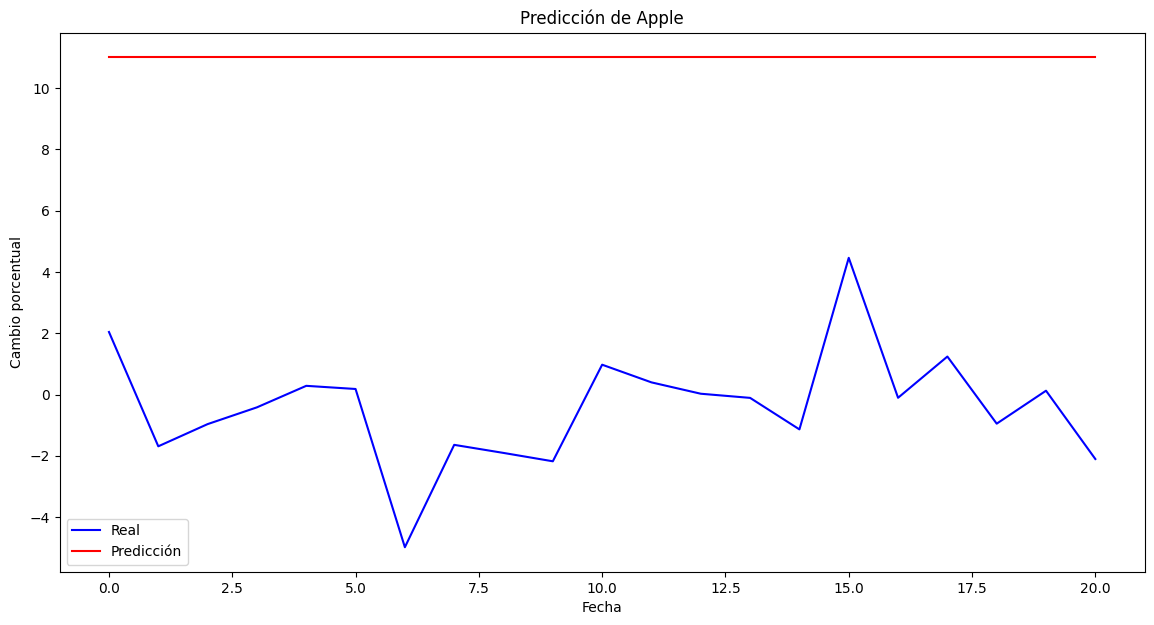

RMSE para Amazon: 19.78981713787932
R^2 para Amazon: -61.48071284091039


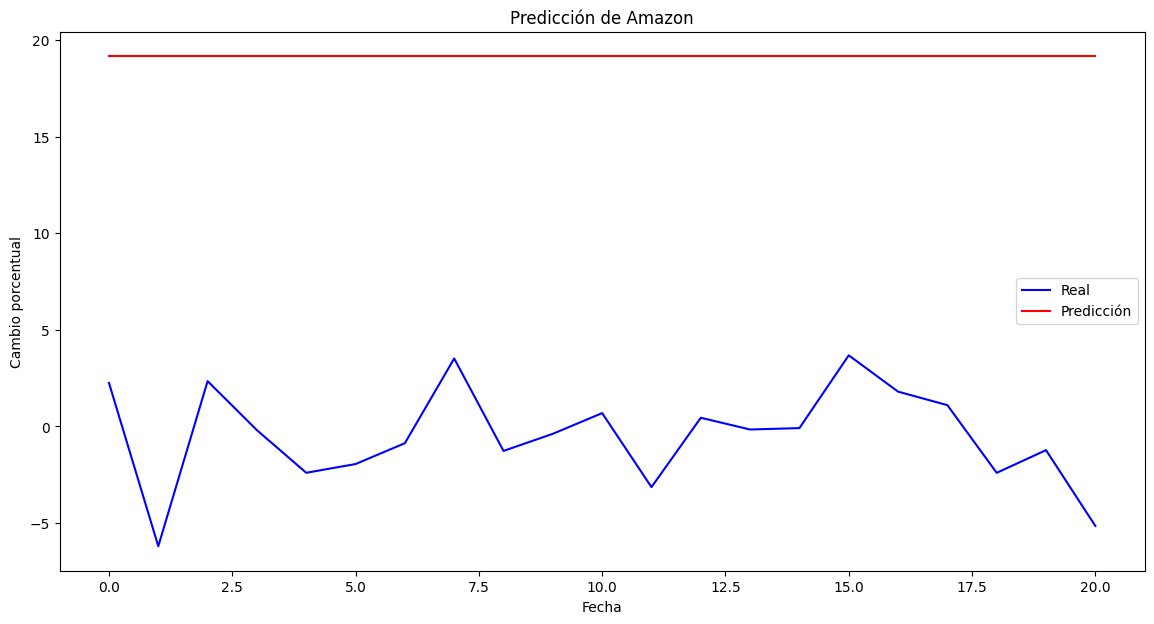

RMSE para Google: 2.2739473672863815
R^2 para Google: -0.3572947912153881


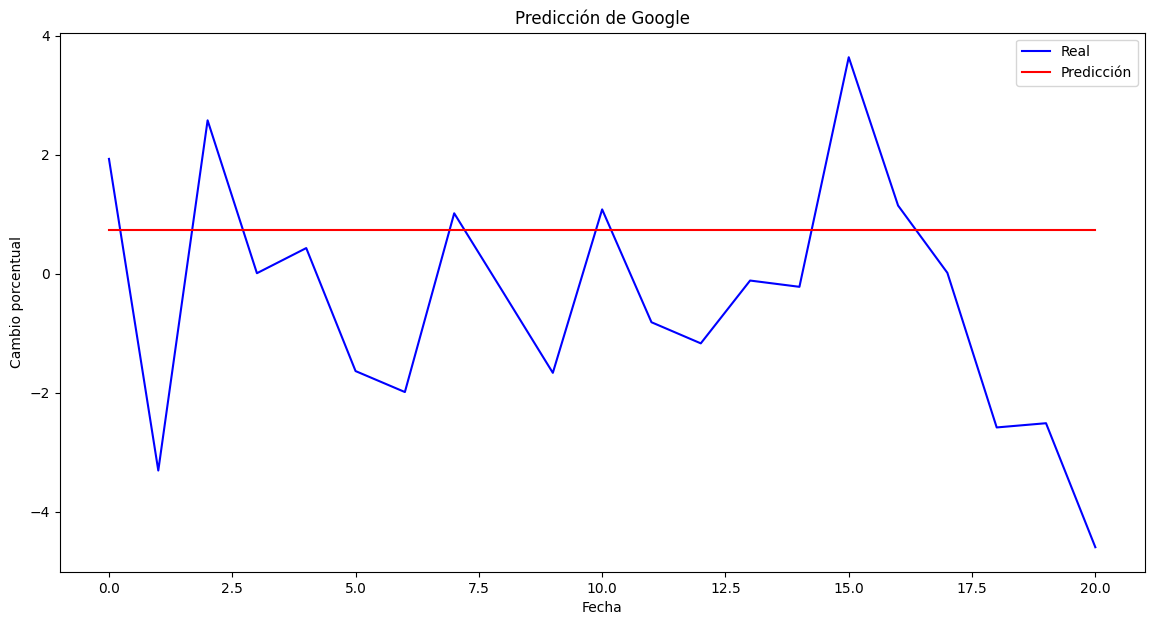

RMSE para Microsoft: 2.9179773366923207
R^2 para Microsoft: -1.9650691380677294


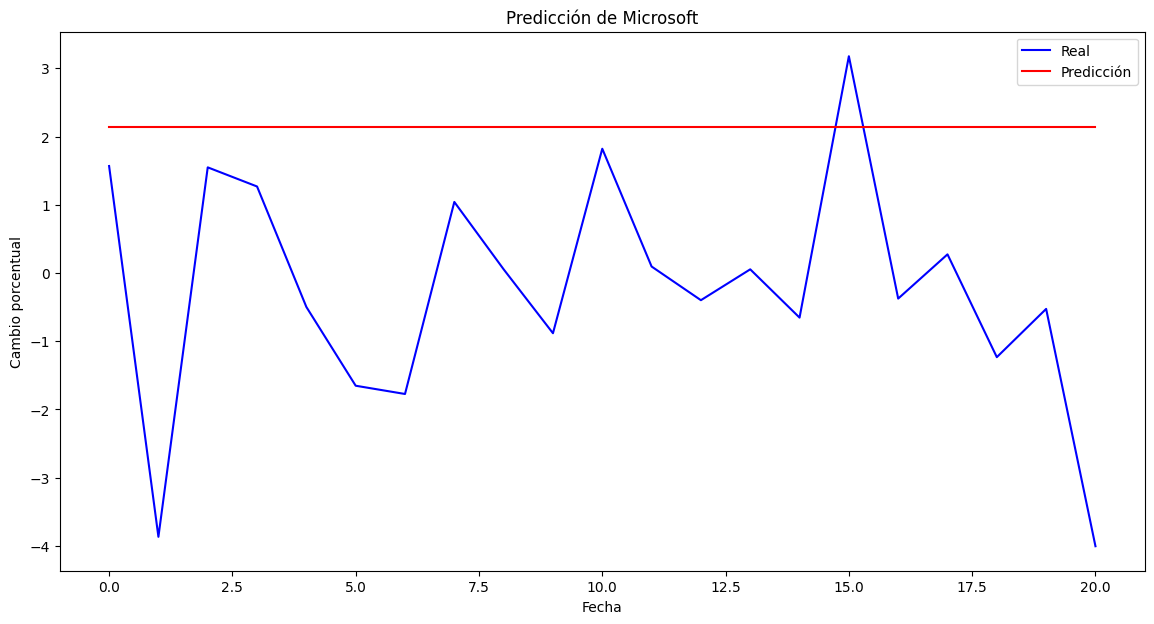

RMSE para Nvidia: 4.664639654469452
R^2 para Nvidia: -0.3054707028142565


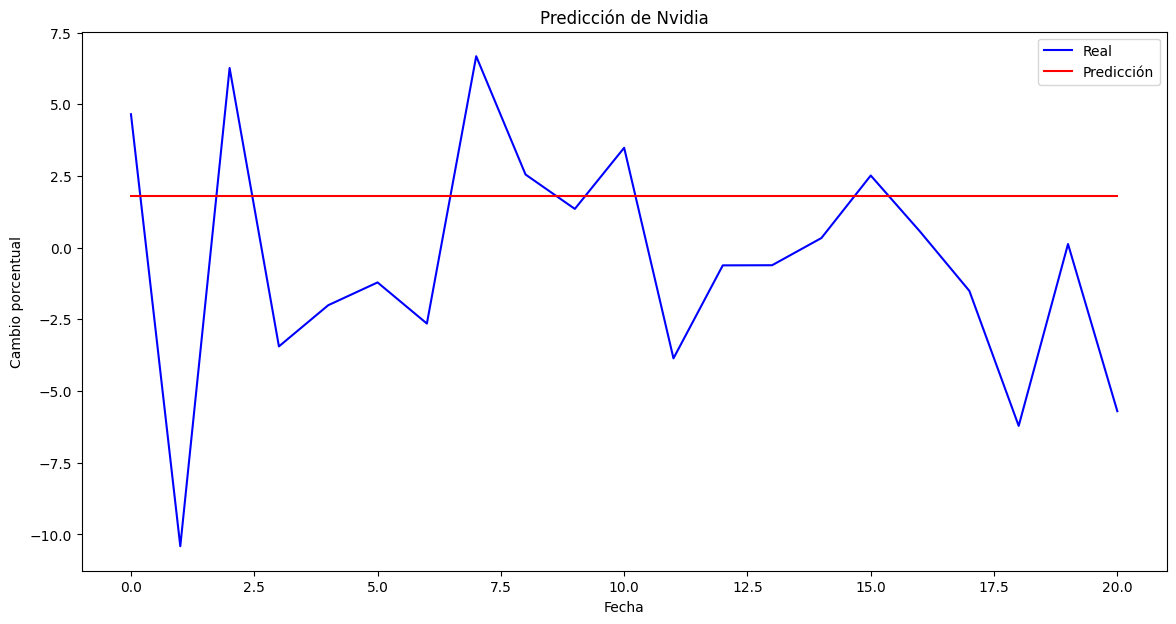

In [58]:
#Acción de Apple
plot_stock_prediction(apple_test_y, apple_pred, 'Apple')
#Acción de Amazon
plot_stock_prediction(amazon_test_y, amazon_pred, 'Amazon')
#Acción de Google
plot_stock_prediction(google_test_y, google_pred, 'Google')
#Acción de Microsoft
plot_stock_prediction(msft_test_y, msft_pred, 'Microsoft')
#Acción de Nvidia
plot_stock_prediction(nvidia_test_y, nvidia_pred, 'Nvidia')

In [59]:
# import random
# import numpy as np

# #Lógica de inversiones, se plantea una inversión al inicio de cada día durante el mes de marzo.
# #La inversión o retiro de cada día dependerá de la predicción del modelo referente a la tendencia de la ETF al final de ese día.

# #Se inicia el proceso un día antes del primer día de marzo (fehca de inicio de la inversión).
# #Se busca el estado actual de cada ETF para el 31 de marzo, una vez cerrada la bolsa.

# #Se inicializan 31 valores para cada ETF, que representan el valor de cada ETF al final de cada día o al inicio del siguiente día.
# #Para esta simulación representarían los valores de ETF al inicio de cada día del mes de marzo.

# cambiosPorcentuales=[[random.uniform(-0.05, 0.05) for _ in range(31)] for _ in range(5)]
# #Gráfica de valores de cada ETF a lo largo del mes de marzo.
# import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 5))
# plt.plot(range(1, 32), [cambiosPorcentuales[0][i] for i in range(31)], label='ETF 1')
# plt.title('Cambios porcentuales del ETF 1 a lo largo del mes de marzo')

# plt.figure(figsize=(5, 5))
# plt.plot(range(1, 32), [cambiosPorcentuales[1][i] for i in range(31)], label='ETF 2')
# plt.title('Cambios porcentuales del ETF 2 a lo largo del mes de marzo')

# plt.figure(figsize=(5, 5))
# plt.plot(range(1, 32), [cambiosPorcentuales[2][i] for i in range(31)], label='ETF 3')
# plt.title('Cambios porcentuales del ETF 3 a lo largo del mes de marzo')

# plt.figure(figsize=(5, 5))
# plt.plot(range(1, 32), [cambiosPorcentuales[3][i] for i in range(31)], label='ETF 4')
# plt.title('Cambios porcentuales del ETF 4 a lo largo del mes de marzo')

# plt.figure(figsize=(5, 5))
# plt.plot(range(1, 32), [cambiosPorcentuales[4][i] for i in range(31)], label='ETF 5')
# plt.title('Cambios porcentuales del ETF 5 a lo largo del mes de marzo')



In [60]:
def money_to_action(money, actual_action_value):
    """
    Función que convierte el dinero a acciones.
    :param money: dinero a convertir
    :param actual_action_value: valor de la acción en ese momento
    :return: número de acciones redondeado a 4 decimales
    """
    try:
        valor=round(money / actual_action_value, 4)
        return valor
    except ZeroDivisionError:
        return 0


def action_to_money(actions, actual_action_value):
    """
    Función que convierte las acciones a dinero.
    :param actions: número de acciones
    :param actual_action_value: valor de la acción en ese momento
    :return: dinero redondeado a 2 decimales
    """
    return round(actions * actual_action_value, 2)


In [61]:
# #Se inicia el proceso de inversión, sabiendo el cambio porcentual de cada ETF respecto al día anterior (la y que actualmente se predice
# # en el modelo).
# #Si el ETF presentó una disminución en su valor se retira una inversión equivalente al total de cartera sobre 1,5 veces el porcentaje 
# # del cambio porcentual.
# #actual invertido en la ETF. Si actualmente no se tiene acciones de la ETF, se inverte un 10% del total de la cartera en caso 
# #de que el cambio porcentual sea practicamente nulo y un 1% del total de la cartera en caso de que el cambio porcentual sea menor que el -100%.

# #Si el ETF presentó un aumento en su valor se invierte una cantidad equivalente 
# # al porcentaje del cambio porcentual respecto al total actual en la cartera.
# #Si actualmente no se tiene acciones en la ETF, se invierte un capital equivalente a 2 veces el 
# # porcentaje del cambio porcentual respecto al total actual en la cartera.
# #Si se predice un aumento de acciones del ETF sobrepasa el umbral del 40% (cambio porcentual), se invierte el capital equivalente a 2 veces 
# # el porcentaje del cambio porcentual respecto al total actual en la cartera y se marca la ETF para el retiro del 75% de acciones al 
# #del día siguiente. Si se predice este aumento y también se tenía previsto el retiro de acciones, en su lugar se 
# #retira un 20% de acciones de la ETF, se deposita el capital equivalente al porcentaje del cambio porcentual respecto al total
# #actual en la cartera y se marca la ETF para el retiro del 75% de acciones al inicio del día siguiente.

# #Las inversiones que dependen del cambio porcentual tienen un máximo del 20% del total de la cartera actual para cuando el cambio porcentual es  positivo y
# #un máximo del 5% del total de la cartera actual para cuando el cambio porcentual es negativo.
# #Los retiros de acciones que estan bajando tiene un máximo del 90% del la acción actual en la ETF.

# #El orden es importante, primero se retiran acciones de las ETF marcadas para el retiro, luego se 
# #retiran acciones de las ETF que presentaron una disminución en su valor, luego se invierte
# #en las ETF de mayor umbral y aquellas que presentaron un aumento en su valor.
# #Y finalmente se invierte en las ETF cuyo valor disminuyó, pero esta inversión es pequeña.
# def dia_bolsa(acciones_actuales, ETF_actual, cambio_porcentual, cartera_actual, retirar_acciones, umbral=0.4):
#     print(ETF_actual)
   
#     #Primero se retira el 50% de acciones de las ETF marcadas para el retiro y cuyo cambio_porcentual es menor que 0.2 (umbral para inversión masiva)
#     for i in range(len(ETF_actual)):
#         if retirar_acciones[i] and cambio_porcentual[i]<=umbral and acciones_actuales[i]>0:
#             valor=action_to_money(acciones_actuales[i]*0.6, ETF_actual[i])
#             acciones_actuales[i]-=acciones_actuales[i]*0.6
#             cartera_actual+=valor
#             print("Retiro del 75% de acciones de la ETF", i+1)
#             print("Acciones actuales después del retiro:", acciones_actuales[i])
#             print("Cartera actual después del retiro:", cartera_actual)
#             retirar_acciones[i]=False
            
#     #Retiro de ETF con umbral que sigue siendo alto
#     for i in range(len(ETF_actual)):
#         if cambio_porcentual[i]>umbral:
#                 if retirar_acciones[i]:
#                     #Retiro del 20% de acciones de la ETF
#                     valor=action_to_money(acciones_actuales[i]*0.2, ETF_actual[i])
#                     acciones_actuales[i]-=acciones_actuales[i]*0.2
#                     cartera_actual+=valor
#                     print("Retiro del 20% de acciones de la ETF de umbral alto", i+1)
#                     print("Cartera actual después del retiro:", cartera_actual)

#     #Se realiza un retiro de inversiones de las ETF que presentaron una disminución en su valor
#     for i in range(len(ETF_actual)):
#         if cambio_porcentual[i]<0:
#             if acciones_actuales[i]>0:
#                 valor=action_to_money(min(0.9,1.5*abs(cambio_porcentual[i]))*acciones_actuales[i], ETF_actual[i])
#                 acciones_actuales[i]-=min(0.9,1.5*abs(cambio_porcentual[i]))*acciones_actuales[i]
#                 cartera_actual+=valor
#                 print("Retiro de acciones de la ETF", i+1)
#                 print("Cartera actual después del retiro:", cartera_actual)

#     #Inversión en las ETF de mayor umbral 
#     for i in range(len(ETF_actual)):
#         if cambio_porcentual[i]>umbral:
#                 if retirar_acciones[i]:
#                     #Inversión del capital equivalente al porcentaje del cambio porcentual respecto al total actual en la cartera
#                     valor=min(abs(cambio_porcentual[i])*cartera_actual, cartera_actual*0.2)
#                     acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
#                     cartera_actual-=valor
#                     retirar_acciones[i]=True
#                     print("Inversión en la ETF de mayor umbral", i+1)
#                     print("Cartera actual después de inversión:", cartera_actual)
#                 else:
#                     valor=min(abs(cambio_porcentual[i])*cartera_actual*2, cartera_actual*0.2), ETF_actual[i]
#                     acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
#                     cartera_actual-=valor
#                     print("Inversión en la ETF con umbral alto", i+1)
#                     print("Cartera actual después de la inversión:", cartera_actual)
#                     retirar_acciones[i]=True

#     #Inversion en las ETF de menor umbral y que presentaron un aumento en su valor.
#     for i in range(len(ETF_actual)):
#         if cambio_porcentual[i]>0:
#             if cambio_porcentual[i]<=umbral:
#                 if acciones_actuales[i]>0:
#                     valor=min(abs(cambio_porcentual[i])*cartera_actual, cartera_actual*0.2)
#                     acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
#                     cartera_actual-=valor
#                     print("Inversión en la ETF con valor positivo", i+1)
#                     print("Cartera actual después de la inversión:", cartera_actual)
#                 else:
#                     valor=min(abs(cambio_porcentual[i])*cartera_actual*2, cartera_actual*0.2)
#                     acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
#                     cartera_actual-=valor
#                     print("Inversión en la ETF con valor positivo", i+1)
#                     print("Cartera actual después de la inversión:", cartera_actual)
#                     print("Acciones actuales después de la inversión:", acciones_actuales[i])
                    
#     #Inversión del 5% en las ETF cuyo valor no cambió y no se tiene acciones. Y del 3% si se tiene acciones.
#     for i in range(len(ETF_actual)):
#         if cambio_porcentual[i]==0:
#             if acciones_actuales[i]<=0:
#                 valor=cartera_actual*0.05   
#                 acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
#                 cartera_actual-=valor
#                 print("Inversión en la ETF con valor nulo", i+1)
#                 print("Cartera actual después de la inversión:", cartera_actual)
#             else:
#                 valor=cartera_actual*0.03
#                 acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
#                 cartera_actual-=valor
#                 print("Inversión en la ETF con valor nulo", i+1)
#                 print("Cartera actual después de la inversión:", cartera_actual)
    
#     #Inversión en las ETF cuyo valor disminuyó, pero esta inversión es pequeña. Solo se inverte si no se tiene acciones de la ETF.
#     for i in range(len(ETF_actual)):
#         if cambio_porcentual[i]<0:
#             if acciones_actuales[i]<=0:
#                 valor=cartera_actual*(0.1*abs(cambio_porcentual[i]))
#                 acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
#                 cartera_actual-=valor
#                 print("Inversión en la ETF con valor negativo", i+1)
#                 print("Cartera actual después de la inversión:", cartera_actual)
                
    
#     print("Acciones actuales al final del día:", acciones_actuales)
#     print("Cartera actual al final del día:", cartera_actual)
#     return cartera_actual, [ETF_actual[i]*(1+cambio_porcentual[i]) for i in range(len(ETF_actual))]


In [62]:

# #Simulación de la inversión a lo largo del mes de abril.
# cartera_mensual=1000
# ETF_actual=[np.random.uniform(100,300) for _ in range(5)]
# cartera_actual=cartera_mensual
# acciones_actuales=[0]*5
# retirar_acciones=[False]*5
# # cambiosPorcentuales=[[0]*31 for _ in range(5)]
# for i in range(1, 31):
    
#     cambioPorcentualDiaActual=[cambiosPorcentuales[j][i] for j in range(5)]
    
#     cartera_actual, ETF_actual=dia_bolsa(acciones_actuales, ETF_actual, cambioPorcentualDiaActual, cartera_actual, retirar_acciones, umbral=0.4)
#     print(f"Día {i}:")
#     print("Cambio porcentual de cada ETF respecto al día anterior:", cambioPorcentualDiaActual)
#     print("Acciones actuales:", acciones_actuales)
#     print("Cartera actual:", cartera_actual)
#     print("Total de capital tanto en la cartera como en las ETF:", sum([action_to_money(acciones_actuales[j], ETF_actual[j]) for j in range(len(ETF_actual))])+cartera_actual)
#     print("\n")
    

In [63]:
ACCION = 'NVDA'

import pandas as pd
train_data = pd.read_csv(f'../data/processed/{ACCION}_train.csv')

test_data = pd.read_csv(f'../data/processed/{ACCION}_test.csv')

RMSE: 14.137224912170307
MSE: 199.86112821728875
R2: -10.991106623881526
Predicciones positivas reales: 10
Predicciones positivas predichas: 8
Predicciones negativas reales: 11
Predicciones negativas predichas: 13
Accuracy: 0.8095238095238095


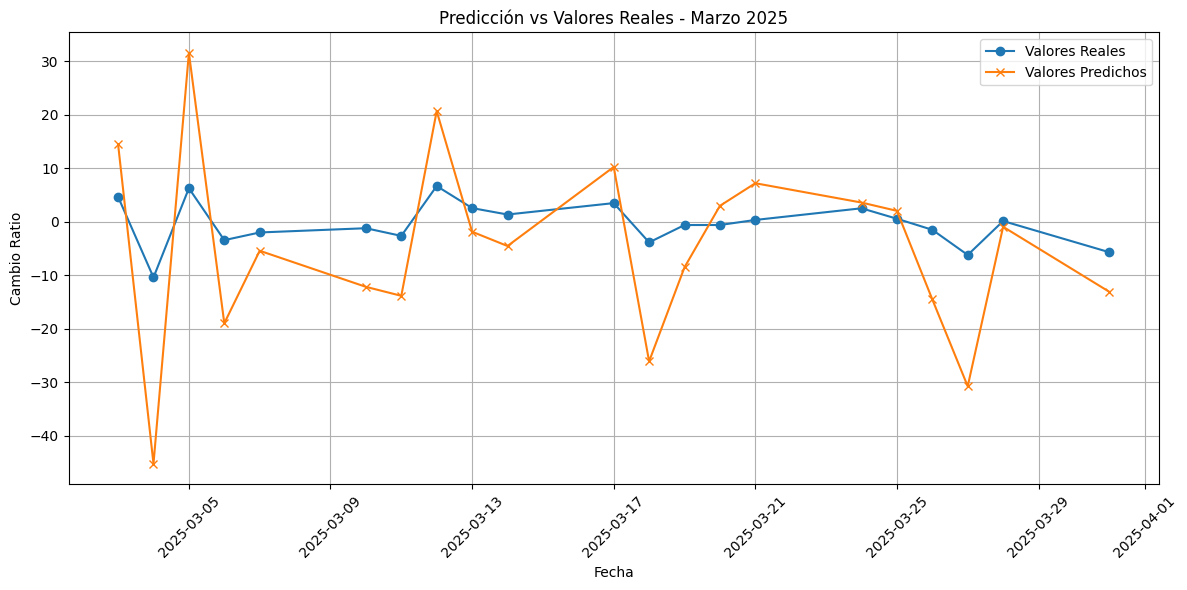

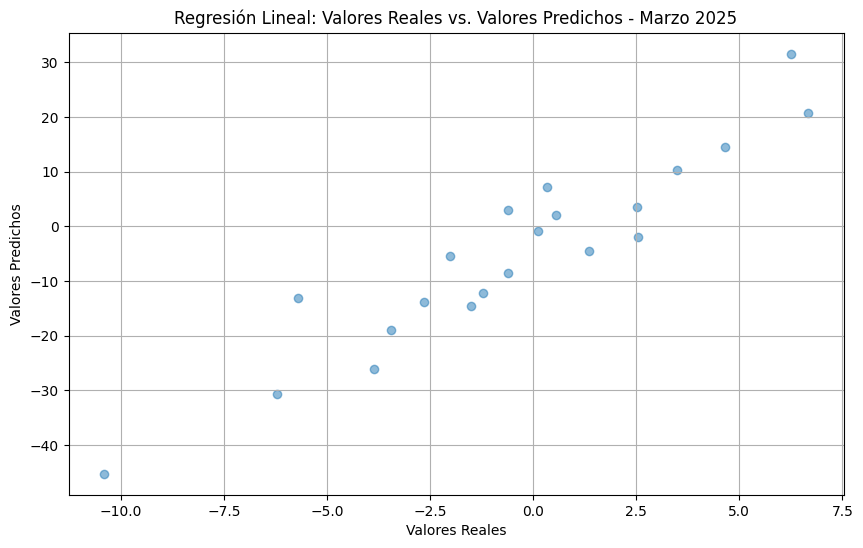

In [64]:
# Cargar los datos de prueba (marzo 2025)
test_data = pd.read_csv(f'../data/processed/{ACCION}_test.csv')

# Asegurarse de que tenemos la columna de fecha
amazon_data_test_with_date = pd.read_csv(f'../data/raw/{ACCION}_with_SP500.csv')
amazon_data_test_with_date = amazon_data_test_with_date[amazon_data_test_with_date['Date'] >= '2025-03-01']
amazon_data_test_with_date = amazon_data_test_with_date[amazon_data_test_with_date['Date'] <= '2025-03-31']

# Preparar datos para predicción
X_test = test_data.drop(columns=['ChangeRatio'])
y_test = test_data['ChangeRatio']
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

# Métricas de evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  

print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

print(f"Predicciones positivas reales: {np.sum(y_test > 0)}")
print(f"Predicciones positivas predichas: {np.sum(y_pred > 0)}")

print(f"Predicciones negativas reales: {np.sum(y_test < 0)}")
print(f"Predicciones negativas predichas: {np.sum(y_pred < 0)}")

accuracy = np.sum((y_test > 0) & (y_pred > 0)) + np.sum((y_test < 0) & (y_pred < 0))
accuracy = accuracy / len(y_test)
print(f"Accuracy: {accuracy}")

# Crear un DataFrame con fechas y valores reales y predichos
result_df = pd.DataFrame({
    'Date': amazon_data_test_with_date['Date'].values[:len(y_test)],
    'Real': y_test.values,
    'Predicción': y_pred
})

# Convertir la columna de fecha a datetime
result_df['Date'] = pd.to_datetime(result_df['Date'])

# Graficar los valores reales y predichos a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(result_df['Date'], result_df['Real'], label='Valores Reales', marker='o')
plt.plot(result_df['Date'], result_df['Predicción'], label='Valores Predichos', marker='x')
plt.xlabel('Fecha')
plt.ylabel('Cambio Ratio')
plt.title('Predicción vs Valores Reales - Marzo 2025')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión Lineal: Valores Reales vs. Valores Predichos - Marzo 2025')
plt.grid(True)
plt.show()

In [65]:
def dia_accion(acciones, precio, cambio, cartera, retirar, umbral=0.4):
    """
    Simula un día de trading sobre una única acción.
    
    Parámetros:
    - acciones: float, número de acciones que tienes al inicio del día.
    - precio:   float, precio unitario de la acción al inicio del día.
    - cambio:   float, predicción de variación porcentual (e.g. +0.03 para +3%).
    - cartera:  float, efectivo disponible al inicio del día.
    - retirar:  bool, flag que indica si ayer marcaste esta acción para retiro masivo.
    - umbral:   float, umbral de “movimiento fuerte” (por defecto 0.4 = 40%).
    
    Devuelve:
    - cartera:  float, efectivo disponible al final del día.
    - precio:   float, nuevo precio de la acción tras aplicar el cambio.
    - acciones: float, número de acciones que tienes al final del día.
    - retirar:  bool, flag para usar mañana si marcaste inversión agresiva.
    """

    # Sólo intentamos vender si tenemos acciones
    if acciones > 0:
        # 1) Retiro masivo (60%) si estaba marcada y hoy no hay un subidón fuerte
        if retirar and cambio <= umbral:
            venta = acciones * 0.6
            cartera += action_to_money(venta, precio)
            acciones -= venta
            retirar = False

        # 2) Retiro moderado (20%) si sigue marcada pero hoy sube > umbral
        if retirar and cambio > umbral:
            venta = acciones * 0.2
            cartera += action_to_money(venta, precio)
            acciones -= venta

        # 3) Retiro por caída: vendemos hasta min(90%, 1.5×|cambio|)
        if cambio < 0:
            porcentaje = min(0.9, 1.5 * abs(cambio))
            venta = acciones * porcentaje
            cartera += action_to_money(venta, precio)
            acciones -= venta

    
    # 4) Si sube más que el umbral, inversión agresiva
    if cambio > umbral:
        # calculamos cuánto invertir: cambio×cartera o 2×cambio×cartera
        factor = 2 if not retirar else 1
        monto = min(abs(cambio) * cartera * factor, cartera * 0.2)
        compras = money_to_action(monto, precio)
        acciones += compras
        cartera -= monto
        retirar = True  # marcamos para posible retiro masivo mañana
    
    # 5) Si sube pero ≤ umbral, inversión moderada
    elif 0 < cambio <= umbral:
        factor = 2 if acciones == 0 else 1
        monto = min(abs(cambio) * cartera * factor, cartera * 0.2)
        compras = money_to_action(monto, precio)
        acciones += compras
        cartera -= monto
    
    # 6) Si no cambia el precio, inversión fija
    elif cambio == 0:
        pct = 0.05 if acciones == 0 else 0.03
        monto = cartera * pct
        compras = money_to_action(monto, precio)
        acciones += compras
        cartera -= monto
    
    # 7) Si cae pero no tenías acciones, pequeña apuesta contraria
    if cambio < 0 and acciones == 0:
        monto = cartera * (0.1 * abs(cambio))
        compras = money_to_action(monto, precio)
        acciones += compras
        cartera -= monto
    
    return cartera, acciones, retirar

In [66]:
raw_data = pd.read_csv(f'../data/raw/{ACCION}_with_SP500.csv')

In [67]:
cartera_mensual=200
acciones=0
cartera=cartera_mensual
retirar=False
umbral=0.4
for index, day_data in X_test.iterrows():
    precio = day_data['Close_lag_1']
    # Convertir Series a DataFrame para evitar el error de dimensionalidad
    day_data_df = pd.DataFrame(day_data).transpose()
    day_scaled = scaler.transform(day_data_df)
    cambio_predicho = model.predict(day_scaled)[0]
    cartera, acciones, retirar = dia_accion(acciones, precio, cambio_predicho, cartera, retirar, umbral)

    # Buscar la fecha correspondiente al precio, con manejo de error si no se encuentra
    fecha_match = raw_data[raw_data['Close'] == precio]
    if len(fecha_match) > 0:
        fecha_row_index = fecha_match.index[0] + 1
        if fecha_row_index < len(raw_data):
            fecha_row = raw_data.iloc[fecha_row_index]
            fecha = fecha_row['Date']
            close = fecha_row['Close']
        else:
            fecha = "Fecha no disponible (índice fuera de rango)"
    else:
        fecha = "Fecha no disponible (precio no encontrado)"
    
    cambio_real = ((close - precio) / precio)*100
    print(f"Día {fecha}:")
    print(f"Close día anterior: {precio}")
    print(f"Close día actual: {close}")
    print(f"Cambio predicho: {cambio_predicho}")
    print(f"Cambio real: {cambio_real}")
    print(f"Acciones: {acciones}")
    print(f"Valor acciones en dolares: {action_to_money(acciones, precio)}")
    print(f"Efectivo disponible: {cartera}")
    print(f"Total capital: {cartera + action_to_money(acciones, precio)}")
    print(f"Retirar: {retirar}")
    print("\n")

Día 2025-03-03:
Close día anterior: 118.00914142194866
Close día actual: 123.49864257535764
Cambio predicho: 14.493376937380766
Cambio real: 4.651759251243889
Acciones: 0.339
Valor acciones en dolares: 40.01
Efectivo disponible: 160.0
Total capital: 200.01
Retirar: True


Día 2025-03-04:
Close día anterior: 123.49864257535764
Close día actual: 110.6398266732206
Cambio predicho: -45.266629303122066
Cambio real: -10.412111124452819
Acciones: 0.013560000000000003
Valor acciones en dolares: 1.67
Efectivo disponible: 200.19
Total capital: 201.85999999999999
Retirar: False


Día 2025-03-05:
Close día anterior: 110.6398266732206
Close día actual: 117.56918811598004
Cambio predicho: 31.574925382748592
Cambio real: 6.262990146600288
Acciones: 0.37546
Valor acciones en dolares: 41.54
Efectivo disponible: 160.152
Total capital: 201.69199999999998
Retirar: True


Día 2025-03-06:
Close día anterior: 117.56918811598004
Close día actual: 113.5195565422474
Cambio predicho: -18.987159420200637
Cambio r